In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np

In [2]:
# os.system("aws --region us-west-1 ec2 describe-instances  --query 'Reservations[*].Instances[*].[PrivateIpAddress]' --output text > all_internal_ips")

# os.system("aws --region us-west-1 ec2 describe-instances  --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_external_ips")

In [3]:
# time.sleep(60)

In [4]:
with open('all_external_ips') as f:
    lines = f.read().splitlines()


lines = [x for x in lines if x!='None']
lines

for ip in lines:
    if ip!='None':
        current = (ip.split('.'))

        print('ssh -i "MAKWest.pem" ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com')

ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-

## Set number of clusters

In [5]:
nclusters = 0

for folder in os.listdir('.'):
    if 'config' in folder and folder!='config':
        nclusters = nclusters + 1
        
        
print(nclusters)


total_count = 16


nreplicas = int(total_count/nclusters)
nodeIps = lines[:nclusters* nreplicas]

nclients = 4

# no_cluster_yet_nodes = lines[nclusters* nreplicas:-(nclusters)]
no_cluster_yet_nodes = lines[nclusters* nreplicas:-nclients]




# clientIps = lines[-(nclusters):]
clientIps = lines[-nclients:]



4


In [6]:
clientIps, no_cluster_yet_nodes

(['127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1'], [])

## Functions

In [7]:
def setup(i):

    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'commands.sh'+' ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:commands.sh'
        
        
        os.system(command)

        
def compile_job(i):
    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ./gradlew installDist'
        
        
        os.system(command)

        
        
def clean_job(i):
    ip = lines[i]
    
#     rm_command = 'sudo rm config/currentView; '
#     for iter_ in range(nclusters):
#         rm_command = rm_command + 'rm config'+str(iter_)+'/currentView; '
        
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S rm ../dump_files/nohup*.out; echo 1234 | sudo -S rm config*/currentView;'
        
        
        os.system(command)
        
        

        
def run_server_node(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and( ip in nodeIps):
        
        current = (ip.split('.'))
        command = 'nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 & echo $! > ../dump_files/jobID_s'+str(i)+'.txt'
        
        
        os.system(command)
        
        
        
    if ip!='None' and( ip in no_cluster_yet_nodes):
        
        current = (ip.split('.'))
        command = 'nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 &'
        
        
        os.system(command)        
#         print(command)



def run_basic_client(i):
    cmd_arg = ''
    
    ip = lines[i]
    if ip!='None' and ip in clientIps:
#     if ip!='None' and ip in nodeIps[1:1+len(clientIps)]:
        
        current = (ip.split('.'))
        
#         cmd_arg = nodeIps[1:1+len(clientIps)].index(ip)
        
        for iter__ in range(len(clientIps)):
            if ip==clientIps[iter__]:
                cmd_arg = iter__
                
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'nohup ./runscripts/ycsbClient.sh '+str(i-len(nodeIps)-len(no_cluster_yet_nodes))+' >../dump_files/nohup_c'+str(i)+'.out 2>&1 &'

        
        os.system(command)


def kill_java(i):
    ip = lines[i]
    
    if ip!='None':
        current = (ip.split('.'))
        command = ' killall java; killall nohup'
        
        
        os.system(command)
        
        
        
def kill_clients(i):
    ip = lines[i]
    if ip!='None' and ip in clientIps:
        current = (ip.split('.'))
        command = 'killall java;  killall nohup"'
        
        
        os.system(command)

def run_server_node_check(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and( ip in nodeIps):
        
        current = (ip.split('.'))
        command = ' nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 &'
        
        
        print(command)
        
        

# for i in range(len(lines)):
#     run_server_node_check(i)

def run_basic_client_check(i):
    cmd_arg = ''
    
    ip = lines[i]
    if ip!='None' and ip in clientIps:
        
        for iter__ in range(len(clientIps)):
            if ip==clientIps[iter__]:
                cmd_arg = iter__
                
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../dump_files/nohup_c'+str(i)+'.out 2>&1 &'

        
        print(command)

# for i in range(len(lines)):
#     run_basic_client_check(i)



def join_node1(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11080 11081 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command)   
        
        
def join_node2(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11090 11091 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command) 
        
def join_node3(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11100 11101 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command) 

## Compile Job

## Setup Client and nodeIPS

In [8]:
len(lines)

20

In [9]:
len(nodeIps), len(clientIps)

(16, 4)

## RUN SERVERS

In [10]:
for i in range(len(lines)):
    kill_java(i)

for i in range(len(lines)):
    clean_job(i)
    
compile_job(1)



java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
java: no process found
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
java: no process found
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
java: no process found
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
java: no process found
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
java: no process found
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
java: no process found
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitte

> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist

BUILD SUCCESSFUL in 2s
3 actionable tasks: 1 executed, 2 up-to-date


In [11]:
    
for i in range(len(lines)-nclients-len(no_cluster_yet_nodes)):
    print(i)
    run_server_node(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [12]:
time.sleep(30)
!tail ../dump_files/nohup_s0.out -n 50

-- Tejas: Sending CID query with ID 4 to replicas [1, 2, 3]
-- Getting connection for ret: bftsmart.communication.server.ServerConnection@12b0404f, remoteId: 2
-- Getting connection for ret: bftsmart.communication.server.ServerConnection@769e7ee8, remoteId: 3
-- Getting connection for ret: bftsmart.communication.server.ServerConnection@419c5f1a, remoteId: 1
-- currentConsensusIdReceived activated
-- Received  CID reply from replica ( or smsg.getSender()) 3 with smsg.getCID() 5 (expecting queryID 5),  waitingCID -1, isInitializing true
-- smsg.getSender() 3, smsg.getState().getLastCID() -1
-- Received 1 replies for query ID 5
-- currentConsensusIdReceived activated
-- Received  CID reply from replica ( or smsg.getSender()) 1 with smsg.getCID() 5 (expecting queryID 5),  waitingCID -1, isInitializing true
-- smsg.getSender() 1, smsg.getState().getLastCID() -1
-- Received 2 replies for query ID 5
-- currentConsensusIdReceived activated
-- Received  CID reply from replica ( or smsg.getSende

In [13]:


# for i in range(len(lines)):
#     kill_java(i)

In [14]:
len(nodeIps)+len(no_cluster_yet_nodes)+len(clientIps)


20

## Run basic client

In [15]:
for i in range(len(nodeIps)+len(no_cluster_yet_nodes),len(nodeIps)+len(no_cluster_yet_nodes)+len(clientIps)):
    run_basic_client(i)

In [16]:
time.sleep(80)

In [17]:

# time.sleep(30)
# run_server_node(8)
# time.sleep(15)
# join_node1(8)

# time.sleep(30)
# run_server_node(9)

# time.sleep(30)
# join_node2(9)

# time.sleep(30)
# run_server_node(10)
# time.sleep(30)
# join_node3(10)

In [18]:
# time.sleep(50)

# run_server_node(9)

# time.sleep(160)
# join_node2(9)


# for i in [2]:
#     os.system('kill -9 `cat ../dump_files/jobID_s2.txt`')
    


# time.sleep(80)



for i in range(len(lines)):
    kill_java(i)
    


java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitted
java(6049): Operation not permitted
nohup: no process found
java(3872): Operation not permitted
java(4736): Operation not permitted
java

In [19]:
# for i in range(len(lines)):
#     kill_java(i)

## Main Job

In [20]:
def getTimesThputs(file):
    f = open(file, "r")
    data = f.readlines() 
    times = []
    thputs = []
    latencies = []
    for line in data:
        if not line.startswith('--') and 'current ops/sec; [UPDATE AverageLatency' in line:

#         print(line)
            times.append(line.split('sec:')[0].strip())
            thputs.append(line.split(';')[1].split('current')[0].strip())
            latencies.append(line.split('=')[1].split(']')[0].strip())

    return np.array(times).astype(float), np.array(thputs).astype(float), np.array(latencies).astype(float)  






def getTimeThps(file, flag):
    
    f = open(file, "r")
    data = f.readlines() 

    times = []
    thputs = []
    for line in data:
        if 'throughput[ops/s]' in line:
            lineData = (line[13+line.find('max[ops/s])>'):-2])
            print(lineData)

            times.append(lineData.split('|')[0])
            thputs.append(lineData.split('|')[-2])
    if (flag): 
        times.append(float(times[-1])+abs(float(times[-1]) - float(times[-2]) ))
        thputs.append(0)
        
    return np.array(times).astype(float), np.array(thputs).astype(float) 


In [21]:
## Byzantine Remote View Change

In [22]:
times ,thputs, lats = getTimesThputs('../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes))+'.out')
times2 ,thputs2, lats = getTimesThputs('../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes)+1)+'.out')


'../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes))+'.out'

'../dump_files/nohup_c16.out'

In [23]:
# times - times2

In [24]:
# thputs = thputs + thputs2

In [25]:
# np.mean(lats[20:]) # 23604.83205128205

In [26]:
np.mean(lats[20:])

653053.6526923076

In [27]:
lats

array([4032575.  , 1836334.  , 3154534.  , 2173836.  , 1829243.5 ,
       1597038.  , 1537385.  , 1431944.  , 1698886.  , 1551295.5 ,
       1595204.  , 2086291.  , 1465074.  , 1355665.  , 1693545.  ,
       1268126.5 ,  487835.25,  455405.25,  509464.5 ,  671895.33,
        985853.5 , 1182052.  ,  926735.  ,  812919.5 ,  995793.  ,
        977460.5 , 1020035.5 ,  860885.  , 1271034.  ,  975489.5 ,
        929952.5 , 1055055.  ,  914546.  ,  851544.33,  720677.  ,
        770337.67,  978108.  ,  769016.  ,  896707.  ,  825578.33,
        587255.5 ,  724385.33,  510646.8 ,  545794.67,  621045.  ,
        735887.33,  420907.83,  229135.5 ,  582275.5 ,  432906.8 ,
        500544.  ,  380933.  ,  466705.  ,  371463.2 ,  452982.6 ,
        353276.8 ,  652011.33,  440535.  ,  599781.33,  368782.57,
        190100.6 ,  528041.  ,  462213.4 ,  402539.2 ,  513023.  ,
        483374.4 ,  439878.25,  505196.25,  416802.17,  404167.25,
        428605.25,  487814.75])

In [28]:
# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()


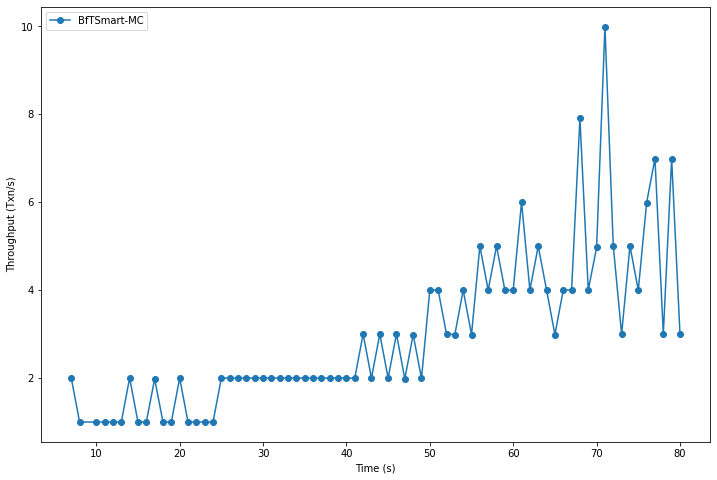

<Figure size 432x288 with 0 Axes>

In [29]:
import pylab as pl

pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Joins Throughput')

# pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

pl.xlabel('Time (s)')
pl.ylabel('Throughput (Txn/s)')
pl.legend()
# pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
pl.show()
pl.clf()


In [30]:
(thputs), np.sum(thputs)

(array([2.  , 1.  , 1.  , 1.  , 1.  , 1.  , 2.  , 1.  , 1.  , 1.98, 1.  ,
        1.  , 2.  , 1.  , 1.  , 1.  , 1.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
        2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
        2.  , 3.  , 2.  , 3.  , 2.  , 3.  , 1.98, 2.99, 1.99, 4.  , 4.  ,
        3.  , 2.99, 4.  , 2.99, 5.  , 4.  , 5.  , 4.  , 4.  , 6.  , 4.  ,
        5.  , 4.  , 2.99, 4.  , 4.  , 7.91, 4.  , 4.97, 9.99, 5.  , 3.  ,
        5.  , 4.  , 5.99, 6.99, 3.  , 6.99, 3.  ]),
 217.75)

In [31]:
# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Joins Throughput')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()
